<a href="https://colab.research.google.com/github/trailrun/ML_books/blob/main/cie_spec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.delftstack.com/ko/howto/python/convex-hull-python/

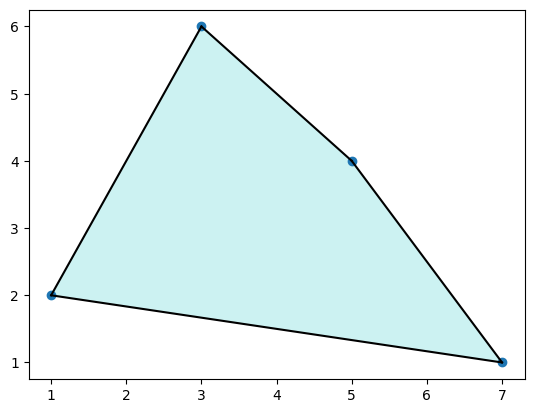

In [ ]:
import numpy as np
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt

# 좌표 4개 설정
points = np.array([[1, 2], [3, 6], [5, 4], [7, 1]])

# Convex Hull 계산
hull = ConvexHull(points)

# 그래프 그리기
plt.plot(points[:,0], points[:,1], 'o')
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-')

plt.fill(points[hull.vertices,0], points[hull.vertices,1], 'c', alpha=0.2)
plt.show()

In [4]:
import numpy as np
from scipy.spatial import ConvexHull

# 좌표 4개 설정
points = np.array([[1, 2], [3, 6], [5, 4], [7, 1]])

# Convex Hull 계산
hull = ConvexHull(points)
hull.area

16.988876885507977

In [3]:
import numpy as np
from scipy.spatial import ConvexHull

# 좌표 4개 설정
points = np.array([[1, 2], [3, 6], [5, 4], [7, 1]])

# Convex Hull 계산
hull = ConvexHull(points)

# 특정 좌표
test_point = np.array([4, 3])

# Convex Hull 내부에 있는지 확인
is_inside = hull.neighbors([test_point])

if is_inside[0]:
    print("주어진 좌표는 내부에 있습니다.")
else:
    print("주어진 좌표는 외곽 또는 외부에 있습니다.")

TypeError: ignored

In [ ]:
import numpy as np
from scipy.spatial import ConvexHull

# 좌표 4개 설정
points = np.array([[1, 2], [3, 6], [5, 4], [7, 1]])

# Convex Hull 계산
hull = ConvexHull(points)

# 특정 좌표
test_point = np.array([[4, 3]])

# Convex Hull 내부에 있는지 확인
is_inside = hull.contains_points(test_point)

if is_inside:
    print("주어진 좌표는 내부에 있습니다.")
else:
    print("주어진 좌표는 외곽 또는 외부에 있습니다.")

AttributeError: ignored

In [5]:
def is_point_inside_polygon(polygon, point):
    n = len(polygon)
    x, y = point

    # 다각형 꼭짓점으로부터 사각형 모서리 생성
    min_x = min(polygon[:, 0])
    max_x = max(polygon[:, 0])
    min_y = min(polygon[:, 1])
    max_y = max(polygon[:, 1])

    if x < min_x or x > max_x or y < min_y or y > max_y:
        return False

    # 사각형 내부에 있는지 확인
    intersections = 0
    for i in range(n):
        x1, y1 = polygon[i]
        x2, y2 = polygon[(i + 1) % n]
        if y > min(y1, y2) and y <= max(y1, y2) and x <= max(x1, x2) and y1 != y2:
            x_intersect = (y - y1) * (x2 - x1) / (y2 - y1) + x1
            if x_intersect > x:
                intersections += 1

    return intersections % 2 != 0

# 다각형 좌표
polygon = np.array([[1, 2], [3, 6], [5, 4], [7, 1]])

# 특정 좌표
test_point = np.array([4, 3])

# 내부에 있는지 확인
if is_point_inside_polygon(polygon, test_point):
    print("주어진 좌표는 내부에 있습니다.")
else:
    print("주어진 좌표는 외부에 있습니다.")

주어진 좌표는 내부에 있습니다.


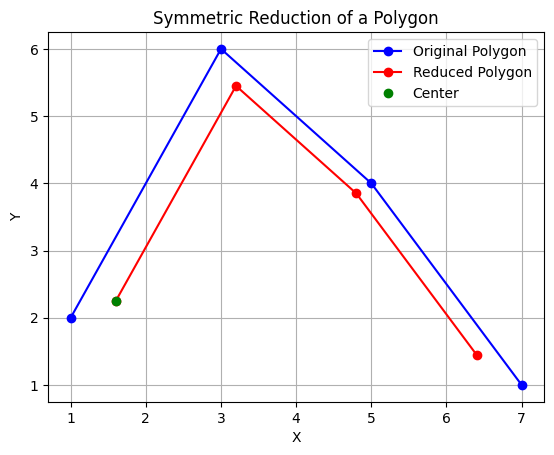

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def symmetric_reduction(polygon, factor):
    # 중심점 계산
    center = np.mean(polygon, axis=0)

    # 다각형의 꼭짓점을 축소하여 새로운 다각형 생성
    new_polygon = []
    for vertex in polygon:
        new_vertex = center + (vertex - center) * factor
        new_polygon.append(new_vertex)

    return np.array(new_polygon)

# 원래 다각형 좌표
original_polygon = np.array([[1, 2], [3, 6], [5, 4], [7, 1]])

# 축소 비율 (0.5는 절반 크기로 축소)
reduction_factor = 0.8

# 대칭 축소 적용
reduced_polygon = symmetric_reduction(original_polygon, reduction_factor)

# 원래 다각형 그리기
plt.plot(original_polygon[:, 0], original_polygon[:, 1], 'bo-', label='Original Polygon')

# 축소된 다각형 그리기
plt.plot(reduced_polygon[:, 0], reduced_polygon[:, 1], 'ro-', label='Reduced Polygon')

# 중심점 그리기
plt.plot(reduced_polygon[0, 0], reduced_polygon[0, 1], 'go', label='Center')

plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Symmetric Reduction of a Polygon')
plt.grid(True)
plt.show()


In [ ]:
''